<a href="https://colab.research.google.com/github/Ruthi-N/CODSOFT/blob/main/Titanic__survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Imported all the required libraries

In [ ]:
titanic_dataset = pd.read_csv("/content/Titanic-Dataset.csv")

Uploaded the csv file

Checking the csv file with head function wherer the firt 5 rows are displayed

In [ ]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Used describe function n titanic dataset

In [ ]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Using value function to find out number of survivors

In [ ]:
titanic_dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Visuavalising the count of survivors wrt Pclass using a graph

<Axes: xlabel='Survived', ylabel='count'>

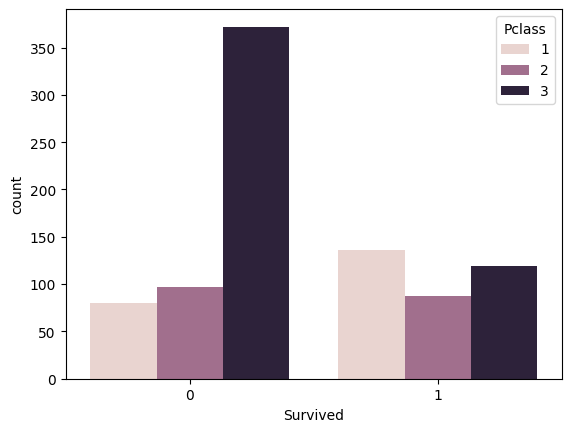

In [ ]:
sns.countplot(x=titanic_dataset['Survived'],hue=titanic_dataset['Pclass'])


Lets visualise the survived with sex

<Axes: xlabel='Survived', ylabel='count'>

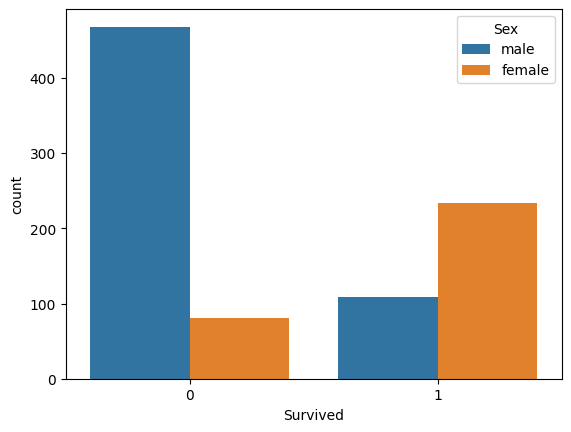

In [ ]:
sns.countplot(x=titanic_dataset['Survived'],hue=titanic_dataset['Sex'])

In [ ]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#checking the updated dataset
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_dataset=titanic_dataset.drop(columns='Cabin',axis=1)

In [ ]:
titanic_dataset['Age'].fillna(titanic_dataset['Age'].mean(),inplace=True)

Removed all rows containing null values

In [ ]:
#fixing embarked
print(titanic_dataset['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
#replacing null values in embarked
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0],inplace=True)

In [ ]:
#recheking the null values
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#counting the number of males and female
titanic_dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
#counting the number of values based on embarked
titanic_dataset['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
#replacing data values in sex and embarked to integer type
titanic_dataset.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [ ]:
#defining x and y
X=titanic_dataset.drop(columns=['PassengerId','Survived','Name','Ticket'],axis=1)
y=titanic_dataset['Survived']

In [ ]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


splitting data into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train.shape,X.shape,y_train.shape,y.shape)

(712, 7) (891, 7) (712,) (891,)


Logistic regression and model training

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_train_predection=model.predict(X_train)

In [ ]:
print(X_train_predection)

[1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0
 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1
 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0
 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 0 0 1 1 1 1 0 0 1 

In [ ]:
training_data_accuracy=accuracy_score(y_train,X_train_predection)
print('Accuracy score of traning data set ',training_data_accuracy)

Accuracy score of traning data set  0.800561797752809


In [ ]:
#check accuracy of the test data
X_test_predection=model.predict(X_test)

In [ ]:
print(y_test)

304    0
585    1
129    0
30     0
58     1
      ..
734    0
721    0
772    0
106    1
687    0
Name: Survived, Length: 179, dtype: int64


In [ ]:
print(X_test_predection)

[0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0]


In [ ]:
test_data_accuracy=accuracy_score(y_test,X_test_predection)
print('accuracy score ',test_data_accuracy)

accuracy score  0.7877094972067039


In [ ]:
import warnings
warnings.filterwarnings("ignore")
res=model.predict()
if(res==0):
  print('Person not survived')
else:
  print('Survived!')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()